#EDA of Scraped Data


In [ ]:
!pip install timm
!pip install pillow
!pip install urllib.request
!pip install torch
!pip install keras
!pip install tensorflow
!pip install hvplot

I have scraped the [watchbase-website](https://watchbase.com/watches) for all of it's brands and models.

The difficulty is that there are multiple variations per model, so I'm trying just to classify by watch brand, with hope that the model captures the small branding on the watchs :)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First Look at how many watch brands, models and total images we have

In [30]:
import os
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/included_data'  # Replace with the path to your data folder

# Get a list of all brands
brands = os.listdir(data_dir)

# Initialize counters
total_models = 0
total_images = 0

# Iterate over each brand
for brand in brands:
    brand_path = os.path.join(data_dir, brand)
    
    # Get a list of all models for the current brand
    models = os.listdir(brand_path)
    
    # Update the total number of models
    total_models += len(models)
    
    # Iterate over each model and count the number of images
    for model in models:
        model_path = os.path.join(brand_path, model)
        
        # Count the number of image files in the current model folder
        images = [file for file in os.listdir(model_path) if file.endswith(".jpg") or file.endswith(".png")]
        total_images += len(images)

# Print the total number of brand, models & image files
print(f"Total brands: {len(brands)}")
print(f"Total models: {total_models}")
print(f"Total image files: {total_images}")


Total brands: 28
Total models: 399
Total image files: 8217


**KORRIGIEREN COUNT**

Then let's look at the distribution of the watch brands

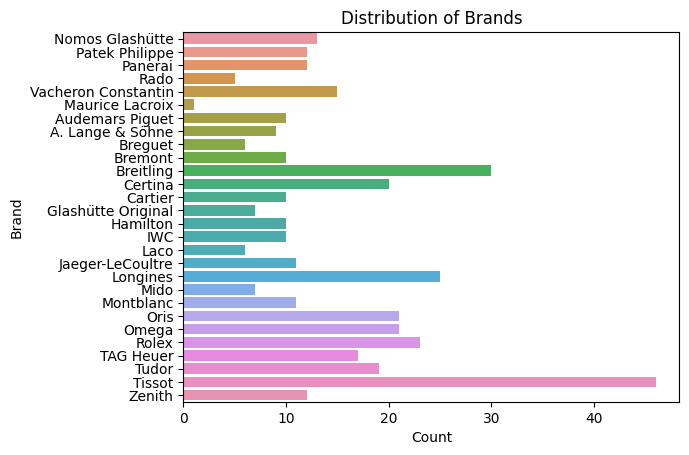

In [31]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# list of brands
brands = os.listdir(data_dir)

# count of images for each brand
brand_counts = {}

for brand in brands:
    brand_counts[brand] = len(os.listdir('/content/drive/MyDrive/included_data/' + brand))

# Plotting the distribution of brands
sns.barplot(x=list(brand_counts.values()), y=list(brand_counts.keys()))
plt.title('Distribution of Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()


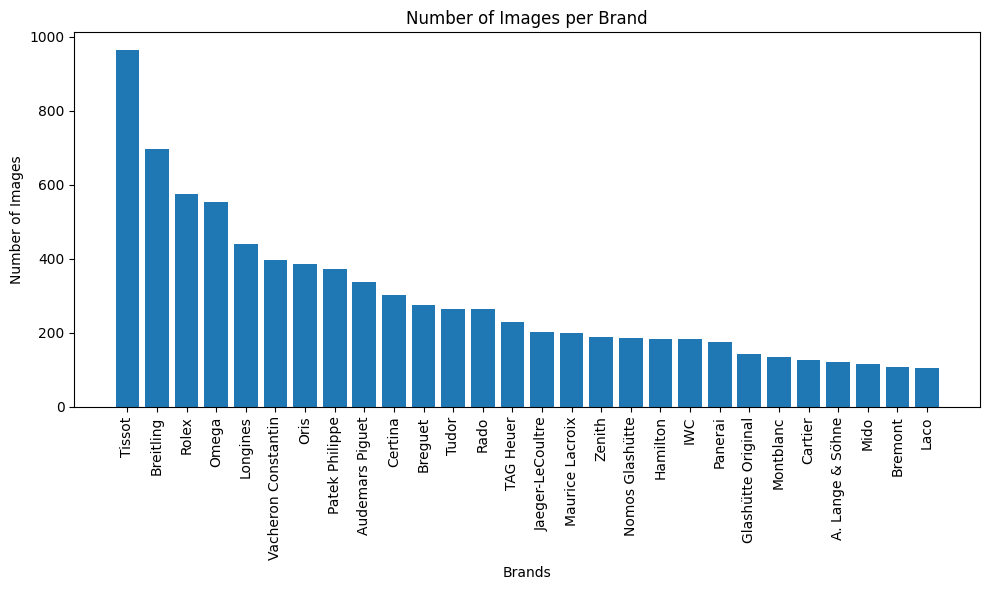

Total image files: 8217


In [32]:
import os
import matplotlib.pyplot as plt

# Get a list of all brands
brands = os.listdir(data_dir)

# Initialize counters
brand_counts = []
total_images = 0

# Iterate over each brand
for brand in brands:
    brand_path = os.path.join(data_dir, brand)
    
    # Get a list of all models for the current brand
    models = os.listdir(brand_path)
    
    # Count the number of images for the current brand
    images_count = 0
    for model in models:
        model_path = os.path.join(brand_path, model)
        
        # Count the number of image files in the current model folder
        images = [file for file in os.listdir(model_path) if file.endswith(".jpg") or file.endswith(".png")]
        images_count += len(images)
    
    # Update the total number of images
    total_images += images_count
    
    # Add the brand and its image count to the list
    brand_counts.append((brand, images_count))

# Sort the brand_counts list based on image count in descending order
brand_counts.sort(key=lambda x: x[1], reverse=True)

# Extract brand names and image counts for plotting
brand_names = [brand[0] for brand in brand_counts]
image_counts = [brand[1] for brand in brand_counts]

# Plot the number of images per brand
plt.figure(figsize=(10, 6))
plt.bar(brand_names, image_counts)
plt.xlabel("Brands")
plt.ylabel("Number of Images")
plt.title("Number of Images per Brand")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the total number of image files
print(f"Total image files: {total_images}")

In [33]:
import os

# Get a list of all brands
brands = os.listdir(data_dir)

# Create a dictionary to store the total number of images per brand
brand_images = {}

# Iterate over each brand
for brand in brands:
    brand_path = os.path.join(data_dir, brand)
    
    # Get a list of all models for the current brand
    models = os.listdir(brand_path)
    
    # Initialize the total number of images for the current brand
    total_images = 0
    
    # Iterate over each model and count the number of images
    for model in models:
        model_path = os.path.join(brand_path, model)
        
        # Count the number of image files in the current model folder
        images = [file for file in os.listdir(model_path) if file.endswith(".jpg") or file.endswith(".png")]
        total_images += len(images)
    
    # Store the total number of images for the current brand in the dictionary
    brand_images[brand] = total_images

# Sort the brands based on the total number of images in descending order
sorted_brands = sorted(brand_images.items(), key=lambda x: x[1], reverse=True)

# Print the descending list of total images per brand
for brand, total_images in sorted_brands:
    print(f"{brand}: {total_images} images")


Tissot: 964 images
Breitling: 696 images
Rolex: 575 images
Omega: 552 images
Longines: 439 images
Vacheron Constantin: 396 images
Oris: 385 images
Patek Philippe: 372 images
Audemars Piguet: 336 images
Certina: 303 images
Breguet: 274 images
Tudor: 265 images
Rado: 264 images
TAG Heuer: 229 images
Jaeger-LeCoultre: 201 images
Maurice Lacroix: 200 images
Zenith: 189 images
Nomos Glashütte: 185 images
Hamilton: 184 images
IWC: 183 images
Panerai: 176 images
Glashütte Original: 142 images
Montblanc: 133 images
Cartier: 125 images
A. Lange & Söhne: 120 images
Mido: 116 images
Bremont: 108 images
Laco: 105 images


**!!!DONT RUN THIS CODE, IT TAKES TO LONG!!!**

Checking the file size distribution of all images

In [ ]:
import cv2
import os
from dask import bag
from dask.diagnostics import ProgressBar
import pandas as pd
import holoviews as hv
import hvplot.pandas  # optional, for hvplot integration with pandas

hv.extension('bokeh')

# Function to get image dimensions
def get_dims(file):
    img = cv2.imread(file)
    if img is not None:
        h, w = img.shape[:2]
        return h, w

# Function to traverse the directory structure and collect image files
def collect_image_files(directory):
    filelist = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                filelist.append(os.path.join(root, file))
    return filelist

# Set your root directory containing subdirectories with images
root_directory = '/content/drive/MyDrive/included_data'

# Collect image files
filelist = collect_image_files(root_directory)

# Parallelize and compute image dimensions
dimsbag = bag.from_sequence(filelist).map(get_dims)

with ProgressBar():
    dims = dimsbag.compute()

dim_df = pd.DataFrame(dims, columns=['height', 'width'])
sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
sizes.hvplot.scatter(x='height', y='width', size='count', xlim=(0, 1200), ylim=(0, 1200), grid=True,
                     xticks=2, yticks=2, height=500, width=600).options(scaling_factor=0.1, line_alpha=1, fill_alpha=0)


As we can see on the plot above most of my image are 165x165 or 474x474, the rest is smaller. (Option: Resizeing)

## Handling Class Imbalance

**!!DONT RUN THIS CODE / THE FOLDER WILL ALREADY BE CREATED!!**

**V1:**
Here I create augmented_data for all the minority classes (all brands with less than 300 images) with the factor 10.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# create a data generator
datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=15, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             brightness_range=[0.2,1.0],
                             zoom_range=0.2,
                             horizontal_flip=True)

# Specify the classes that are underrepresented
underrepresented = ['Breguet', 'Tudor', 'Rado', 'TAG Heuer', 'Jaeger-LeCoultre', 
                    'Maurice Lacroix', 'Zenith', 'Nomos Glashütte', 'Hamilton', 
                    'IWC', 'Panerai', 'Glashütte Original', 'Montblanc', 'Cartier',
                    'A. Lange & Söhne', 'Mido', 'Bremont', 'Laco'
                    ] 

# Iterate over the data generator and save the augmented images to a directory
for brand in underrepresented:
    for model in os.listdir('/content/drive/MyDrive/included_data/' + brand):
        for img in os.listdir('/content/drive/MyDrive/included_data/' + brand + '/' + model):
            image = load_img('/content/drive/MyDrive/included_data/' + brand + '/' + model + '/' + img) 
            image = img_to_array(image) 
            image = image.reshape((1,) + image.shape)

            # Create a new directory for each brand and model if it does not exist yet
            directory = '/content/drive/MyDrive/augmented_data/' + brand + '/' + model
            if not os.path.exists(directory):
                os.makedirs(directory)

            i = 0
            for batch in datagen.flow(image, batch_size=1, 
                                      save_to_dir=directory, 
                                      save_prefix='aug', save_format='jpeg'):
                i += 1
                if i > 10: # Depending on how much you want to oversample
                    break


count of augmented data

In [34]:
underrepresented = ['Breguet', 'Tudor', 'Rado', 'TAG Heuer', 'Jaeger-LeCoultre', 
                    'Maurice Lacroix', 'Zenith', 'Nomos Glashütte', 'Hamilton', 
                    'IWC', 'Panerai', 'Glashütte Original', 'Montblanc', 'Cartier',
                    'A. Lange & Söhne', 'Mido', 'Bremont', 'Laco'
                    ] 

# Iterate over each brand and count the number of augmented images
for brand in underrepresented:
    total_images = 0
    for model in os.listdir('/content/drive/MyDrive/augmented_data/' + brand):
        for img in os.listdir('/content/drive/MyDrive/augmented_data/' + brand + '/' + model):
            total_images += 1
    print(f"{brand}: {total_images} images")


Breguet: 2769 images
Tudor: 2894 images
Rado: 2662 images
TAG Heuer: 2491 images
Jaeger-LeCoultre: 2186 images
Maurice Lacroix: 1990 images
Zenith: 2055 images
Nomos Glashütte: 2014 images
Hamilton: 2002 images
IWC: 1998 images
Panerai: 1922 images
Glashütte Original: 1545 images
Montblanc: 1451 images
Cartier: 1360 images
A. Lange & Söhne: 1310 images
Mido: 1261 images
Bremont: 1177 images
Laco: 877 images


maybe also delete some augmented data again?
-check how many images i know have
-how do i combine my original & augmented data?

**V2:** lets oversample till each brand has 950 images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# Create a data generator
datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=15, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             brightness_range=[0.2,1.0],
                             zoom_range=0.2,
                             horizontal_flip=True)

target_images = 950 # The target number of images per class

# Get all the brands
brands = os.listdir('/content/drive/MyDrive/included_data')

# Iterate over the data generator and save the augmented images to a directory
for brand in brands:
    for model in os.listdir('/content/drive/MyDrive/included_data/' + brand):
        current_images = os.listdir('/content/drive/MyDrive/included_data/' + brand + '/' + model)
        current_images_count = len(current_images)

        if current_images_count < target_images:
            augmentation_needed = target_images - current_images_count

            for img in current_images:
                image = load_img('/content/drive/MyDrive/included_data/' + brand + '/' + model + '/' + img) 
                image = img_to_array(image) 
                image = image.reshape((1,) + image.shape)

                # Create a new directory for each brand and model if it does not exist yet
                directory = '/content/drive/MyDrive/augmented_data2/' + brand + '/' + model
                if not os.path.exists(directory):
                    os.makedirs(directory)

                i = 0
                for batch in datagen.flow(image, batch_size=1, 
                                          save_to_dir=directory, 
                                          save_prefix='aug', save_format='jpeg'):
                    i += 1
                    if i >= augmentation_needed:
                        break


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools

# Create a data generator for the original data
datagen_original = ImageDataGenerator(rescale=1./255)
generator_original = datagen_original.flow_from_directory(
        '/content/drive/MyDrive/included_data',
        target_size=(150, 150),  # Resize all images to 150x150
        batch_size=32,
        class_mode='categorical')

# Create a data generator for the augmented data
datagen_augmented = ImageDataGenerator(rescale=1./255)
generator_augmented = datagen_augmented.flow_from_directory(
        '/content/drive/MyDrive/augmented_data',
        target_size=(150, 150),  # Resize all images to 150x150
        batch_size=32,
        class_mode='categorical')

# Concatenate the original and augmented data
generator_combined = itertools.chain(generator_original, generator_augmented)


Found 8217 images belonging to 28 classes.
Found 33964 images belonging to 20 classes.


In [37]:
# Get class indices
class_indices = generator_original.class_indices

# Initialize a dictionary to hold the counts
class_counts = {class_name: 0 for class_name in class_indices.keys()}

# Count the images in the original generator
for class_label in generator_original.classes:
    class_name = list(class_indices.keys())[list(class_indices.values()).index(class_label)]
    class_counts[class_name] += 1

# Count the images in the augmented generator
for class_label in generator_augmented.classes:
    class_name = list(class_indices.keys())[list(class_indices.values()).index(class_label)]
    class_counts[class_name] += 1

# Now class_counts should hold the total number of images per class
for class_name, count in class_counts.items():
    print(f'{class_name}: {count} images')


A. Lange & Söhne: 1430 images
Audemars Piguet: 3105 images
Breguet: 1451 images
Breitling: 2056 images
Bremont: 108 images
Cartier: 1670 images
Certina: 2305 images
Glashütte Original: 2140 images
Hamilton: 2370 images
IWC: 1060 images
Jaeger-LeCoultre: 2191 images
Laco: 1366 images
Longines: 1890 images
Maurice Lacroix: 2214 images
Mido: 2038 images
Montblanc: 2795 images
Nomos Glashütte: 185 images
Omega: 3043 images
Oris: 3279 images
Panerai: 2231 images
Patek Philippe: 372 images
Rado: 264 images
Rolex: 575 images
TAG Heuer: 229 images
Tissot: 964 images
Tudor: 265 images
Vacheron Constantin: 396 images
Zenith: 189 images


#Train Test Validation
Know I split my original data into train test validation and the augmented into train & validation.

In [41]:
import tensorflow as tf

data_dir_original = os.path.join(os.curdir, '/content/drive/MyDrive/included_data')
data_dir_augmented = os.path.join(os.curdir, '/content/drive/MyDrive/augmented_data')

BATCH_SIZE = 32
IMG_SIZE = (165, 165)


# Create datasets for original data
train_dataset_original = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_original,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

validation_dataset_original = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_original,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

# Create datasets for augmented data
train_dataset_augmented = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_augmented,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

validation_dataset_augmented = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_augmented,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

# Combine the datasets
train_dataset = train_dataset_original.concatenate(train_dataset_augmented)
validation_dataset = validation_dataset_original.concatenate(validation_dataset_augmented)



Found 8217 files belonging to 28 classes.
Using 6574 files for training.
Found 8217 files belonging to 28 classes.
Using 1643 files for validation.
Number of validation batches: 42
Number of test batches: 10


In [42]:
# Determine the number of samples for validation and test sets
validation_batches = tf.data.experimental.cardinality(validation_dataset)
test_batches = validation_batches // 5

# Split the validation dataset into validation and test sets
validation_dataset = validation_dataset.skip(test_batches)
test_dataset = validation_dataset.take(test_batches)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Number of validation batches: 34
Number of test batches: 8


As recommended in the lesson:
It is convenient to use buffered prefetching to load images from disk without having I/O become blocking. That is what the next cell does.

In [45]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [38]:
train_datagen_original = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen_original = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator_original = train_datagen_original.flow_from_directory(
        '/content/drive/MyDrive/included_data',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training') # set as training data

validation_generator_original = val_datagen_original.flow_from_directory(
        '/content/drive/MyDrive/included_data', # same directory as training data
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation') # set as validation data


Found 6584 images belonging to 28 classes.
Found 1633 images belonging to 28 classes.


create a testdata set from splitting the 

In [39]:
test_datagen_original = ImageDataGenerator(rescale=1./255)

test_generator_original = test_datagen_original.flow_from_directory(
    '/content/drive/MyDrive/test_data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')


FileNotFoundError: ignored

In [ ]:
print('Number of training batches:', len(train_generator_original))
print('Number of validation batches:', len(validation_generator_original))
print('Number of test batches:', len(test_generator_original))


# ML2 Project of johnjos1: Image Classification & Analysis of Watches

**I have to delete this later on:**

I have a dataset from [Kaggle](https://www.kaggle.com/datasets/ahedjneed/fancy-watche-images/versions/4?resource=download), that provides watch images from different brands



First Mount Google Drive (file has to be shared to other student or can be download from kaggle and save on its own drive with root-foldername "watches")

I know display 10 random images from each brand just to look at the data and see if the picutres are legit. (didn't set a seed)

SyntaxError: ignored

The pictures look good and realisitc, some show multiple watches, some are stand alone, worn on the wrist or in a watch-box, some are bit more zoomed in or zoomed out, but I think that's okay.

**DELETE THIS STEP LATER ON**

Let us see how many images there are for each brand, to check if the classes are balanced.

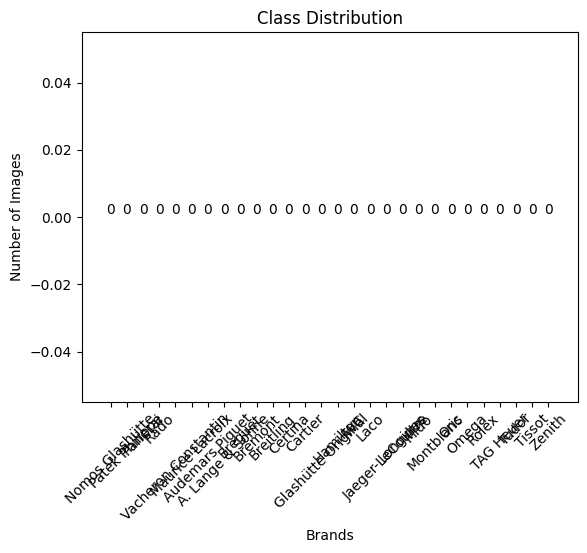

In [35]:
class_counts = [len(glob.glob(os.path.join(data_dir, brand, "*.jpg"))) for brand in brands]

plt.bar(brands, class_counts)
plt.xlabel("Brands")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.xticks(rotation=45)

# Add count labels on top of each bar
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


As we can see the data set is fully balanced each brand contains exactly 200 pictures

## Data Augmentation



### Data Gen, not working ????

In [ ]:
original_images_dir = '/content/drive/MyDrive/watches/data'
augmented_images_dir = '/content/drive/MyDrive/augmented/watches/data'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define the path to your original images
original_images_dir = '/content/drive/MyDrive/watches/data'

# Generate augmented images and save them to a directory
augmented_images_dir = '/content/drive/MyDrive/augmented/watches/data'
augmented_data_generator = datagen.flow_from_directory(
    original_images_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# # Iterate over the augmented_data_generator to generate and process the augmented images
# for i in range(2000 // 32):
#     images, labels = next(augmented_data_generator)
#     # Process the augmented images and labels as needed
#     # Your model training code goes here


Found 2000 images belonging to 10 classes.


### Data augmentation demo
I tried [various preprocessing classes](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing) and chose the one below, because these are the ones that make sence for image data

In [ ]:
import tensorflow as tf

with tf.device('/cpu:0'):  # This line is essential only if you are using an M1 Processor
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.RandomFlip('horizontal_and_vertical'),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.4), #or less zoom
        tf.keras.layers.RandomCrop(1024, 1024),
        tf.keras.layers.CenterCrop(1024, 1024),
        #tf.keras.layers.Resizing(224, 224),
    ])


In [ ]:
img =  tf.keras.utils.load_img('/content/drive/MyDrive/watches/data/Audemars Piguet/019_af4b8c96.jpg')
#img = tf.cast(tf.expand_dims(img, 0), tf.float32)
img = tf.expand_dims(img, 0)

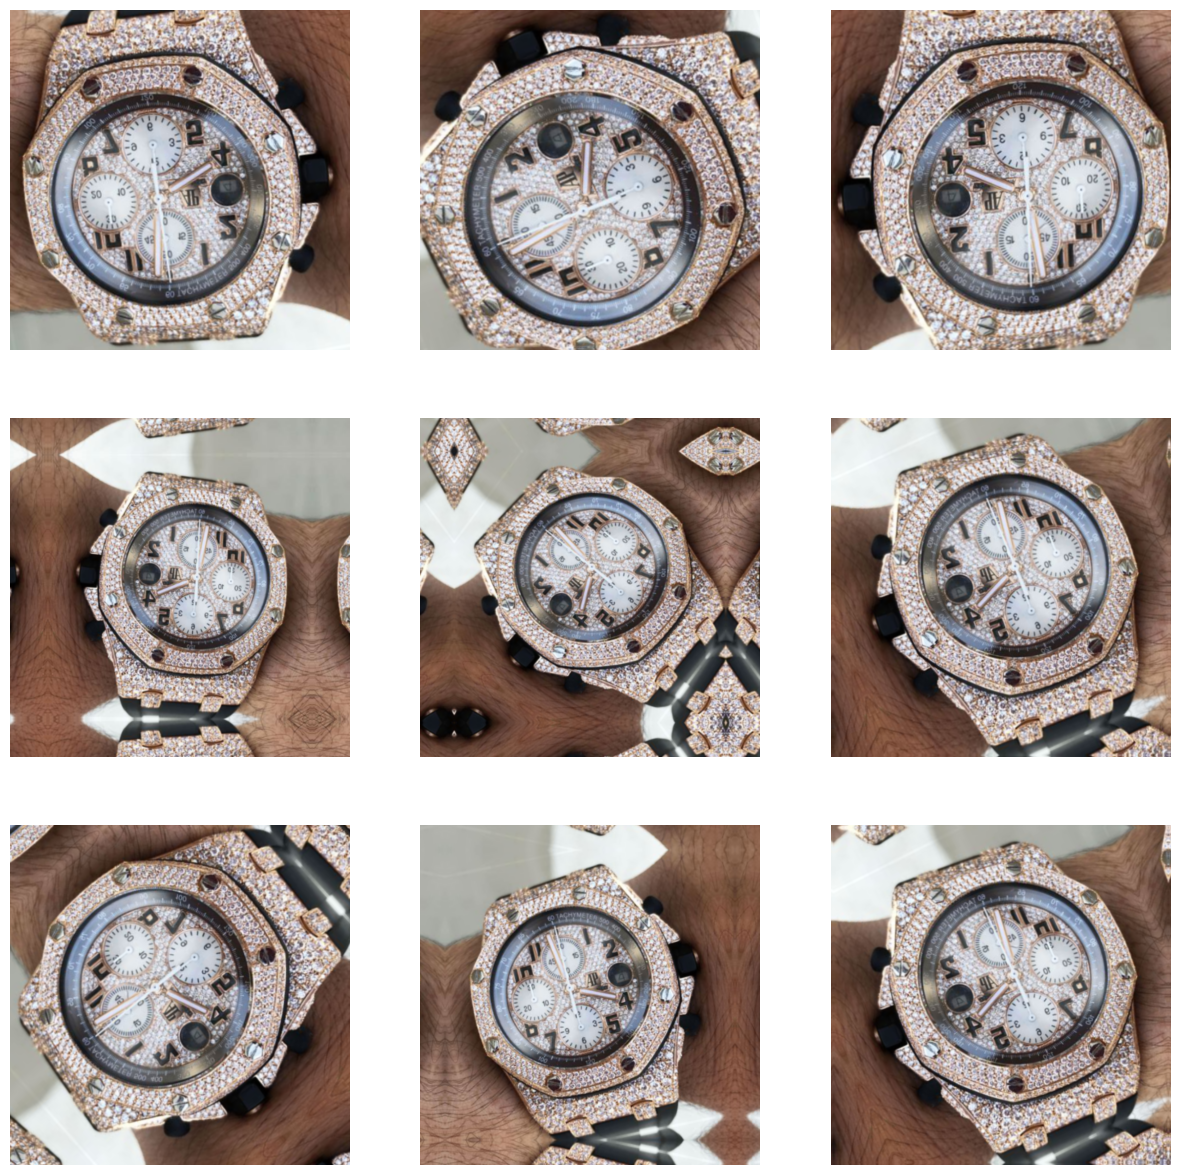

In [ ]:
import matplotlib.pyplot as plt

with tf.device('/cpu:0'):
    plt.figure(figsize=(15, 15))
    for i in range(9):
      augmented_image = data_augmentation(img)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_image[0] / 255)
      plt.axis("off")

## Split the Data

Creating a training, test & validation dataset

My data is structured in folders and Subfolders, so the model can easily detect the classes.
As mentioned in the classes I then later use the:'[tf.keras.utils.image_dataset_from_directory'](https://www.tensorflow.org/tutorials/load_data/images) , which labels the data according to the subfolders. In my case the watch brands

In [ ]:
data_dir = os.path.join(os.curdir, '/content/drive/MyDrive/watches/data')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Split the data into training, validation sets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=777,
    validation_split=0.20,
    subset="training"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=999,
    validation_split=0.20,
    subset="validation"
)

# Determine the number of samples for validation and test sets
validation_batches = tf.data.experimental.cardinality(validation_dataset)
test_batches = validation_batches // 5

# Split the validation dataset into validation and test sets
validation_dataset = validation_dataset.skip(test_batches)
test_dataset = validation_dataset.take(test_batches)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Found 2000 files belonging to 10 classes.
Using 1600 files for training.
Found 2000 files belonging to 10 classes.
Using 400 files for validation.
Number of validation batches: 11
Number of test batches: 2


Let's look at a sample of how the training data looks like

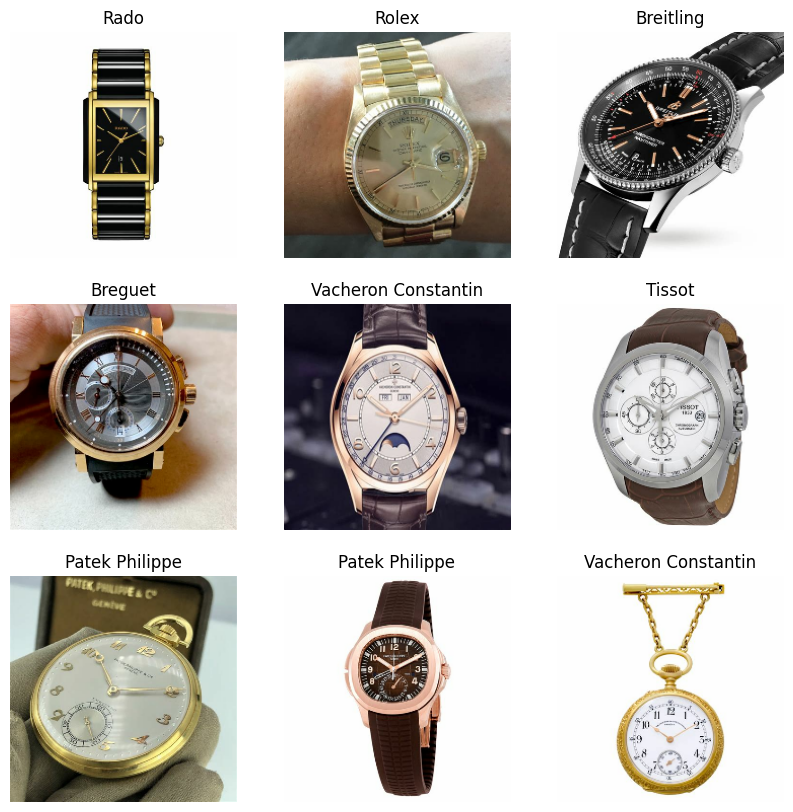

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

As recommended in the class, I implement this code for buffered prefetching, to reduce the possibility of I/O blocking

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Applied Data augmentation



In [ ]:
## second time in code, maybe delete
with tf.device('/cpu:0'): 
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.RandomFlip('horizontal_and_vertical'),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.4), #or less zoom
        tf.keras.layers.RandomCrop(299, 299),
        tf.keras.layers.CenterCrop(224, 224),
        #tf.keras.layers.Resizing(224, 224),
    ])

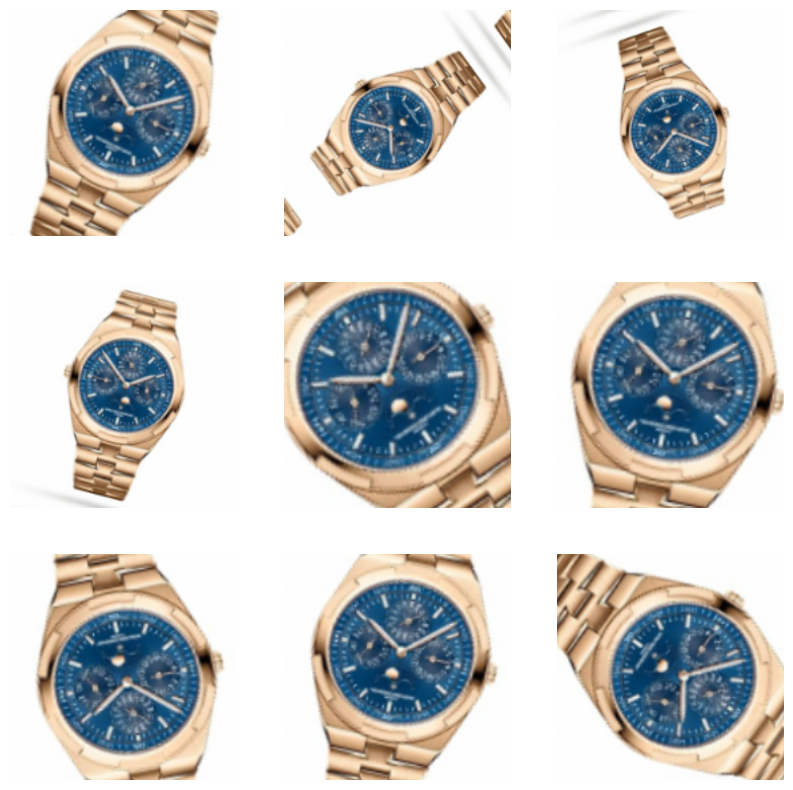

In [ ]:
with tf.device('/cpu:0'):
    for image, _ in train_dataset.take(1):
      plt.figure(figsize=(10, 10))
      first_image = image[0]
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

## Xception as Transfer Learning Model

[Xception](https://keras.io/api/applications/xception/) trained on ImageNet

[-1,1]

Here I initiate the Xception model with:

1.   Input Shape (224,224,3)
2.  weights = pretrained on ImageNet
3. with setting include_top = False I refuse to use the fully connected layers that are on top of the network


In [ ]:
preprocess_input = tf.keras.applications.xception.preprocess_input

# Create the base model from the pre-trained model Xception
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.Xception(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

feature extractor converts 224,224,3 into 32,7,7,2048 block of features

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 2048)


In [ ]:
base_model.trainable = False #freezing
print(base_model.trainable) # if False, it confirms that the model's trainable parameters 
                            # are indeed frozen, and the weights will not be updated during training

False


# Transfer Learning Setup

As seen before we have fozen the trainable parameters, so we keep the pretrained weights and prevent them from updating during training.
This helps me to use the Xception model as a feature extractor.
Now the model es ready to learn additional features from my watches (I hope so.)



In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

Here we again see a confirmation, that the weights are frozen --> Trainable params: 0.

We will now add our own custom layers on top of the frozen Xception base and train only these new layers. This way, we can adapt the model to our specific task while leveraging the valuable features learned by Xception.

By utilizing transfer learning in this manner, we aim to achieve better performance with less training time and data requirements.

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False) #We need to set `training=False` as our model contains a `BatchNormalization` layer. More explanation here https://www.tensorflow.org/guide/keras/transfer_learning
x = tf.keras.layers.GlobalAveragePooling2D()(x) #this layer has the same purpose as tf.keras.layers.Flatten(). Need to connect something 2D to something 1D. Ask if you want to know more :)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x) #!!!define number of classes now 10 brands
model = tf.keras.Model(inputs, outputs)


In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0   

## Model Training

As learned I first see the inital evaluation on the validation dataset, without training the model.

In [ ]:
initial_epochs = 40

loss0, accuracy0 = model.evaluate(validation_dataset)

11/11 [==============================] - 8s 214ms/step - loss: 2.3367 - accuracy: 0.1161


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.34
initial accuracy: 0.12


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
import keras
checkpoint_path = "third_40_try_checkpoint.h5"

model_checkpoint = keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_best_only=True,
    save_weights_only=True,
    monitor='val_loss',
    verbose=1
)


add the callback back to training if wanted (optional)

In [ ]:
callbacks = [early_stopping, model_checkpoint]

history = model.fit(
    train_dataset,
    epochs=initial_epochs,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/40
50/50 [==============================] - ETA: 0s - loss: 2.3255 - accuracy: 0.0969
Epoch 1: val_loss improved from inf to 2.28992, saving model to third_40_try_checkpoint.h5
50/50 [==============================] - 16s 199ms/step - loss: 2.3255 - accuracy: 0.0969 - val_loss: 2.2899 - val_accuracy: 0.1429
Epoch 2/40
50/50 [==============================] - ETA: 0s - loss: 2.2846 - accuracy: 0.1481
Epoch 2: val_loss improved from 2.28992 to 2.26747, saving model to third_40_try_checkpoint.h5
50/50 [==============================] - 10s 192ms/step - loss: 2.2846 - accuracy: 0.1481 - val_loss: 2.2675 - val_accuracy: 0.1964
Epoch 3/40
50/50 [==============================] - ETA: 0s - loss: 2.2632 - accuracy: 0.1750
Epoch 3: val_loss improved from 2.26747 to 2.24220, saving model to third_40_try_checkpoint.h5
50/50 [==============================] - 10s 195ms/step - loss: 2.2632 - accuracy: 0.1750 - val_loss: 2.2422 - val_accuracy: 0.2143
Epoch 4/40
50/50 [=======================

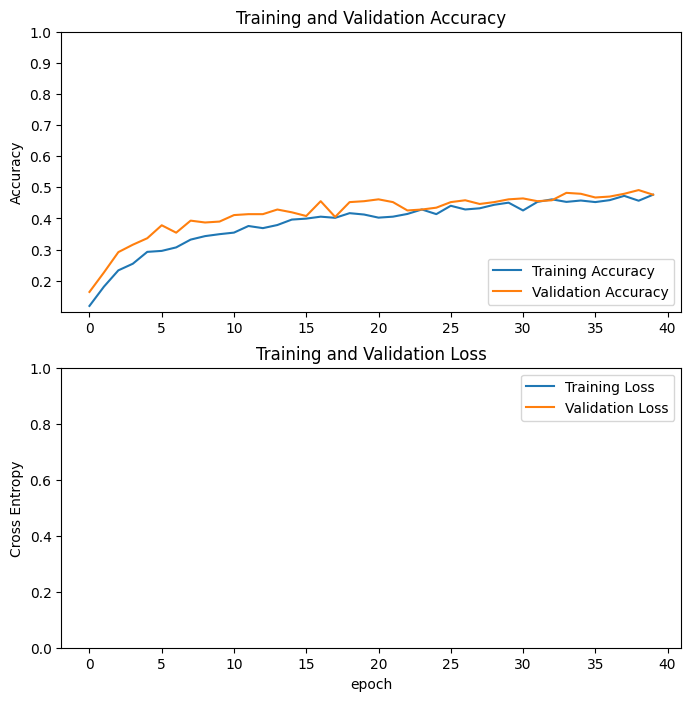

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine Tuning

Know I unfreeze the pretrained model

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  132


In [ ]:
fine_tune_at = 122

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

lowering the learning rate

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_11 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 tf.math.truediv_6 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_6 (TFOpLam  (None, 256, 256, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0   

In [ ]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 40/60
50/50 [==============================] - 17s 138ms/step - loss: 1.5759 - accuracy: 0.4556 - val_loss: 1.5348 - val_accuracy: 0.4673
Epoch 41/60
50/50 [==============================] - 8s 146ms/step - loss: 1.5166 - accuracy: 0.4837 - val_loss: 1.5088 - val_accuracy: 0.4851
Epoch 42/60
50/50 [==============================] - 8s 144ms/step - loss: 1.4733 - accuracy: 0.4988 - val_loss: 1.4789 - val_accuracy: 0.4911
Epoch 43/60
50/50 [==============================] - 7s 116ms/step - loss: 1.4292 - accuracy: 0.5156 - val_loss: 1.4096 - val_accuracy: 0.5089
Epoch 44/60
50/50 [==============================] - 8s 147ms/step - loss: 1.3889 - accuracy: 0.5219 - val_loss: 1.4006 - val_accuracy: 0.5179
Epoch 45/60
50/50 [==============================] - 8s 145ms/step - loss: 1.4022 - accuracy: 0.5063 - val_loss: 1.3931 - val_accuracy: 0.5268
Epoch 46/60
50/50 [==============================] - 8s 132ms/step - loss: 1.3747 - accuracy: 0.5537 - val_loss: 1.3443 - val_accuracy: 0.544

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

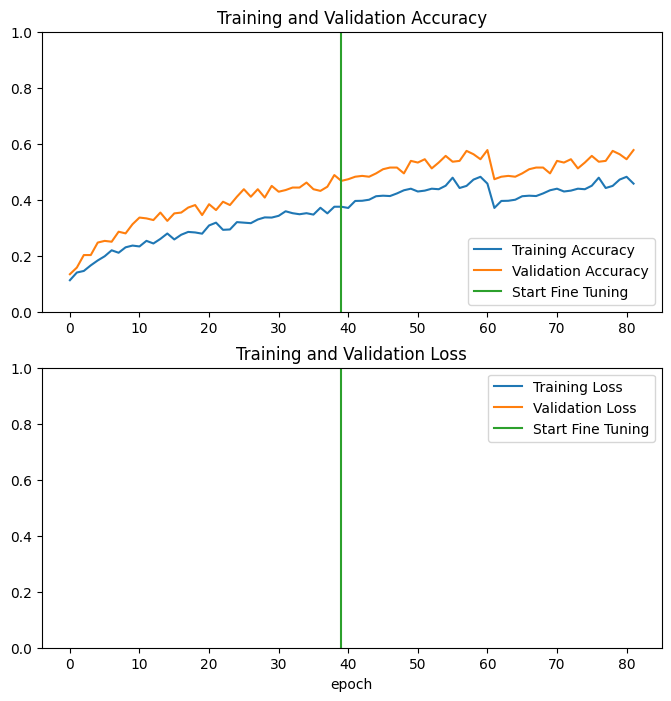

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Evaluation & Prediction

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

2/2 [==============================] - 1s 94ms/step - loss: 0.9961 - accuracy: 0.6719
Test accuracy : 0.671875


Predictions:
 [7 4 2 1 4 5 1 3 0 3 5 4 2 4 8 6 7 0 5 1 0 6 0 8 9 7 6 5 5 3 6 1]
Labels:
 [7 4 2 3 4 5 1 8 0 5 5 3 2 4 8 6 2 0 0 1 0 6 0 4 1 7 6 9 5 3 6 9]


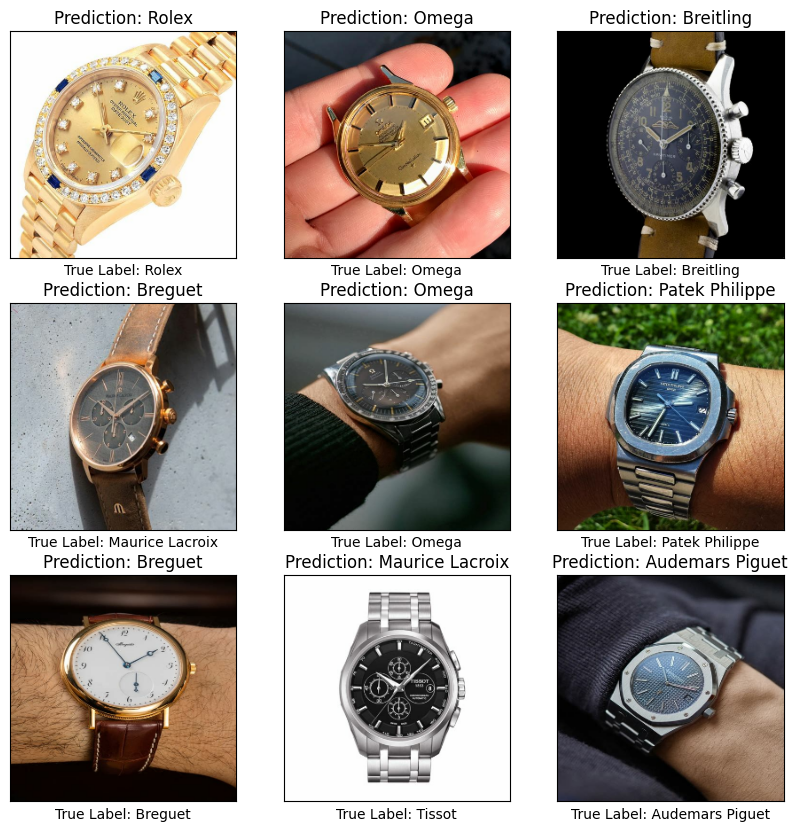

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

predicted_classes = tf.argmax(predictions, axis=1).numpy()

print('Predictions:\n', predicted_classes)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title('Prediction: {}'.format(class_names[predicted_classes[i]]))
    plt.xlabel('True Label: {}'.format(class_names[label_batch[i]]))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)


First I want to load two pretrained model to see how they would perform just so.
My idea was to load a ViT-Model and the one of the newer better performing models like senet, vgg or Xception. I tend to Xception, because according to the [keras webpage](https://keras.io/api/applications/) it performs really good eventhough it's not such a big model (MB)

CNN normally work good on small data sets
an exception is this thread that explains [ViT for small datasets](https://keras.io/examples/vision/vit_small_ds/)

